In [1]:
# import pandas as pd
# from langdetect import detect

In [2]:
# reviewss = pd.read_csv("19.084 tokopedia playstore summarization.csv", header=0, parse_dates=[0], index_col=0)

In [3]:
# reviews = reviewss['Original']

In [4]:
# def is_english(text):
#     try:
#         lang = detect(text)
#         return lang == 'id'
#     except:
#         return False

# count = 1
# # Loop through the Series and remove non-English strings
# for index, value in reviews.items():
#     if not is_english(value):
#         reviews.drop(index, inplace=True)
        
#     if count%1000 == 0:
#         print(f'{count} Done')
#     count += 1


In [5]:
# len(reviews)

In [6]:
# reviews.to_csv("13.363 tokopedia playstore summarization.csv")

In [7]:
# reviewss = reviewss.apply(lambda x: x + "%%%")

In [8]:
# reviewss.to_csv('1000 Facebook Playstore English.csv')

In [9]:
# !pip install langdetect

In [10]:
import pandas as pd
from datetime import datetime
import string
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv("Facebook_PlayStore 50.727 English Reviews Mei 2023.csv", header=0, parse_dates=[0], index_col=0, date_parser=parser)


In [11]:
df.head()

,content
at,
2023-05-31 19:43:40,Very good
2023-05-31 19:43:35,Bsdk tum pahle post ganda hatao tab coment gan...
2023-05-31 19:43:29,Very good app
2023-05-31 19:41:07,good
2023-05-31 19:40:32,I hate answering questions .


In [12]:
reviews = df['content'].loc[(df.index >= datetime(2023, 5, 1)) & (df.index < datetime(2023, 6, 1))]

In [13]:
reviews.head()

at
2023-05-31 19:43:40                                            Very good
2023-05-31 19:43:35    Bsdk tum pahle post ganda hatao tab coment gan...
2023-05-31 19:43:29                                        Very good app
2023-05-31 19:41:07                                                 good
2023-05-31 19:40:32                         I hate answering questions .
Name: content, dtype: object

In [14]:
reviews.tail()

at
2023-05-01 00:03:22    Dear facebook pls delete profile lock option t...
2023-05-01 00:02:03                                  this is so good app
2023-05-01 00:00:48                                                   🥰🥰
2023-05-01 00:00:22                                             Khankhan
2023-05-01 00:00:02                                         RfiklULMOlla
Name: content, dtype: object

In [15]:
len(reviews)

50727

In [16]:
all_reviews = ' '.join(reviews.astype(str).tolist())
all_reviews[:1000]

"Very good Bsdk tum pahle post ganda hatao tab coment ganda hatega bsdk Very good app good I hate answering questions . A xz...x Rtby ত্তm It's a very useful app this app change my lifestyle and improve my language to became my life better.. best apps😊👍 santosh das Thanks for your time today Nrn nrn sipping good face book Nice I love how family and friends can stay connected. I don't care for the agenda push. I truly don't like the government involved in a social media app. Facebook needs to go back to just being a way to connect family and friends. It's a great app for that! Nice Full of ads Acñv1p1òtयञ1oh badas xcyxu6Ienabled s g Achhe se Work nahi Kar raha Nice. I cannot even find my password you rlly need to put on the settings like the password nice sieedk I just got hacked but unknown person yesterday 30/5/2023, luckily my friend inform me immediately or else it will be a disaster 😭. There are many similar cases happened around me,my friends and family. Feeling insecure and unpro

In [17]:
# NLTK tokenization
words = word_tokenize(all_reviews)

# Remove symbols and emoticons
filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

# Remove stopwords
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))
filtered_words = [word for word in filtered_words if word.lower() not in stopwords_en]

# manual_sw = ["facebook","app"]
# filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
filtered_reviews2 = ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Create the mask
masking = np.array(Image.open('Facebook.png'))

#Grab the mask colors
colors = ImageColorGenerator(masking)

# Generate the word cloud with additional parameters
wordcloud_rsw = WordCloud(
    width=2143,
    height=2143,
    background_color='black',
    color_func=colors,
    mask=masking,
    contour_color='blue',
    contour_width=1,
    font_path='KlavikaRegular-TF.otf',
    max_words=100,
    max_font_size=500
).generate(filtered_reviews2)

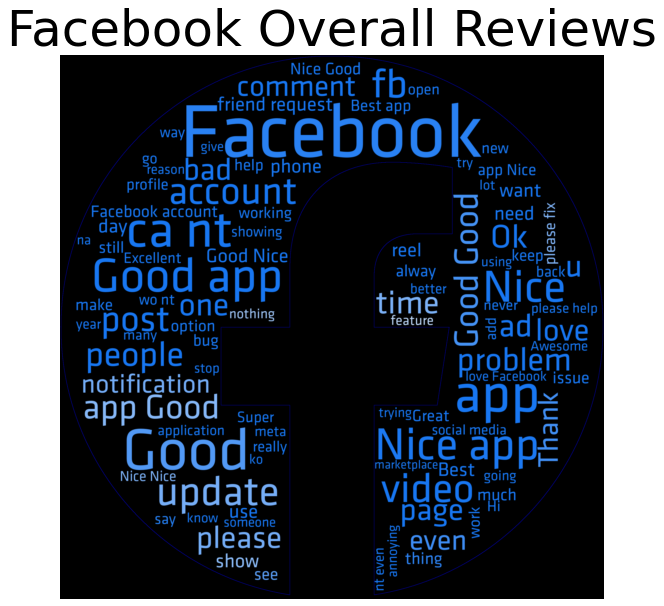

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_rsw, interpolation='bilinear')
plt.axis('off')
plt.title('Facebook Overall Reviews', fontsize=50, color='black')
plt.show()

In [20]:
dfs = pd.read_csv("Facebook_PlayStore 500 PlayStore english reviews sentiment.csv", header=0, parse_dates=[0], index_col=0)

In [21]:
dfs.head()

,content,sentiment
0,Very good app,1
1,I hate answering questions .,-1
2,It's a very useful app this app change my life...,1
3,Thanks for your time today,1
4,good face book,1


In [22]:
dfs.tail()

,content,sentiment
495,Good.appp,1
496,Why free facebook...,-1
497,My id Is disable in on any reason,-1
498,Update the app so that when you use Facebook m...,0
499,Cool,1


In [23]:
dfs_sentiment_positive = dfs[dfs['sentiment'] == 1]
dfs_sentiment_negative = dfs[dfs['sentiment'] == -1]
dfs_sentiment_neutral = dfs[dfs['sentiment'] == 0]

In [24]:
print(len(dfs_sentiment_positive),len(dfs_sentiment_negative),len(dfs_sentiment_neutral))

186 231 83


In [25]:
def word_cloud(dfs_reviews,sentiment):
    reviews = dfs_reviews.iloc[:,0]
    all_reviews = ' '.join(reviews.astype(str).tolist())
    
    # NLTK tokenization
    words = word_tokenize(all_reviews)

    # Remove symbols and emoticons
    filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Remove stopwords
    nltk.download('stopwords')
    stopwords_en = set(stopwords.words('english'))
    filtered_words = [word for word in filtered_words if word.lower() not in stopwords_en]

#     manual_sw = ["facebook","app"]
#     filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
    filtered_reviews2 = ' '.join(filtered_words)

    # Generate the word cloud with additional parameters
    wordcloud_rsw = WordCloud(
        width=2143,
        height=2143,
        background_color='black',
        color_func=colors,
        mask=masking,
        contour_color='blue',
        contour_width=1,
        font_path='KlavikaRegular-TF.otf',
        max_words=100,
        max_font_size=500
    ).generate(filtered_reviews2)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud_rsw, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Facebook {sentiment} Reviews', fontsize=50, color='black')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


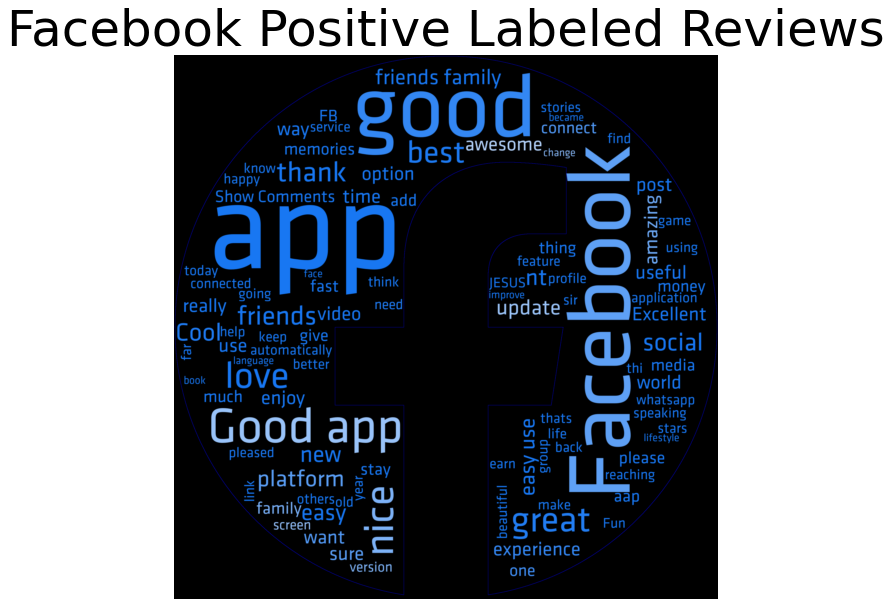

In [26]:
word_cloud(dfs_sentiment_positive,sentiment='Positive Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


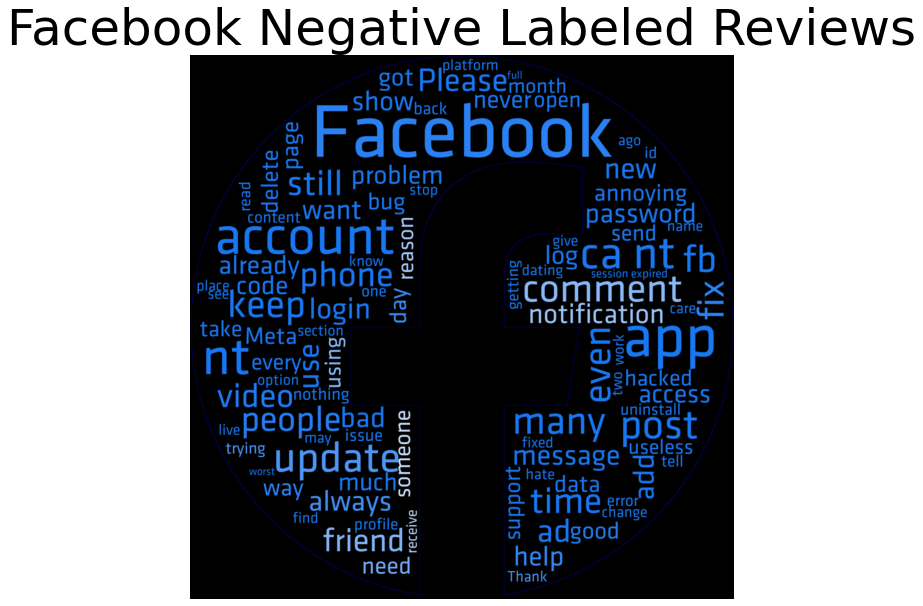

In [27]:
word_cloud(dfs_sentiment_negative,sentiment='Negative Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


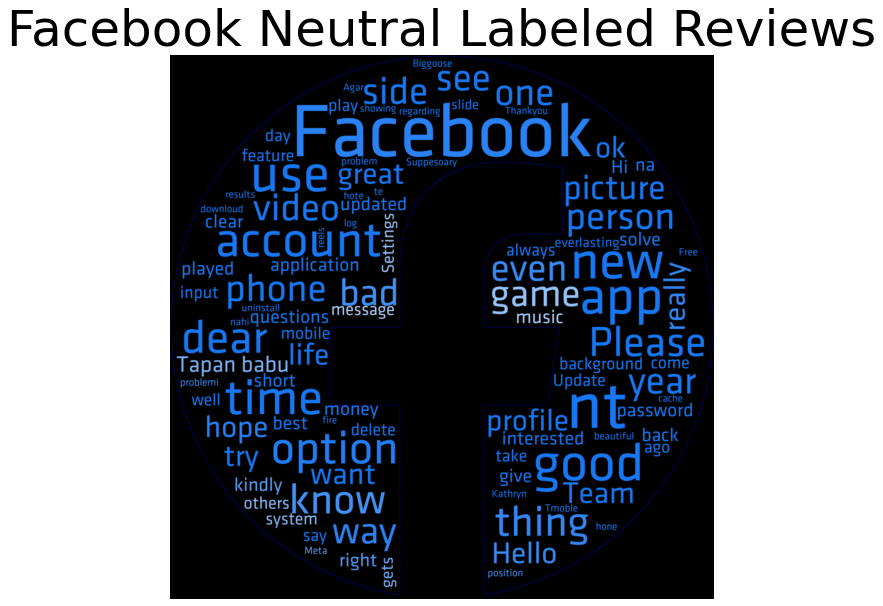

In [28]:
word_cloud(dfs_sentiment_neutral,sentiment='Neutral Labeled')